### Lab6 - Cats and Dogs

- [cats-v-dogs dataset](https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765)

In [38]:
import random
import warnings as warn
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

warn.filterwarnings("ignore")

In [13]:
import os
import zipfile

output = 'dataset/cats-v-dogs.zip'
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('dataset/cats-v-dogs')

os.remove(output)

In [16]:
print(len(os.listdir('dataset/cats-v-dogs/PetImages/Cat')))
print(len(os.listdir('dataset/cats-v-dogs/PetImages/Dog')))

# expected output: 12501 12501

12501
12501


In [33]:
os.makedirs('dataset/cats-v-dogs', exist_ok=True)
os.makedirs('dataset/cats-v-dogs/training', exist_ok=True)
os.makedirs('dataset/cats-v-dogs/testing', exist_ok=True)
os.makedirs('dataset/cats-v-dogs/training/cats', exist_ok=True)
os.makedirs('dataset/cats-v-dogs/training/dogs', exist_ok=True)
os.makedirs('dataset/cats-v-dogs/testing/cats', exist_ok=True)
os.makedirs('dataset/cats-v-dogs/testing/dogs', exist_ok=True)

In [34]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "dataset/cats-v-dogs/PetImages/Cat/"
TRAINING_CATS_DIR = "dataset/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "dataset/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "dataset/cats-v-dogs/PetImages/Dog/"
TRAINING_DOGS_DIR = "dataset/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "dataset/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [35]:
print(len(os.listdir('dataset/cats-v-dogs/training/cats/')))
print(len(os.listdir('dataset/cats-v-dogs/training/dogs/')))
print(len(os.listdir('dataset/cats-v-dogs/testing/cats/')))
print(len(os.listdir('dataset/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [44]:
TRAINING_DIR = "dataset/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size=250, class_mode='binary', target_size=(150, 150))

VALIDATION_DIR = "dataset/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, batch_size=250, class_mode='binary', target_size=(150, 150))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [45]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=90, validation_data=validation_generator, validation_steps=6)

Epoch 1/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - acc: 0.5465 - loss: 0.7365 - val_acc: 0.6613 - val_loss: 0.6209
Epoch 2/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.6750 - val_loss: 0.6147
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 67s 719ms/step - acc: 0.6831 - loss: 0.5994 - val_acc: 0.7187 - val_loss: 0.5534
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.7340 - val_loss: 0.5457
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 77s 834ms/step - acc: 0.7257 - loss: 0.5408 - val_acc: 0.7413 - val_loss: 0.5214
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.7080 - val_loss: 0.5507
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 69s 745ms/step - acc: 0.7470 - loss: 0.5125 - val_acc: 0.7440 - val_loss: 0.5092
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.7440 - val_loss: 0.5158
Epoch 9/15
90/90 ━━━━━━━━━

<Figure size 640x480 with 0 Axes>

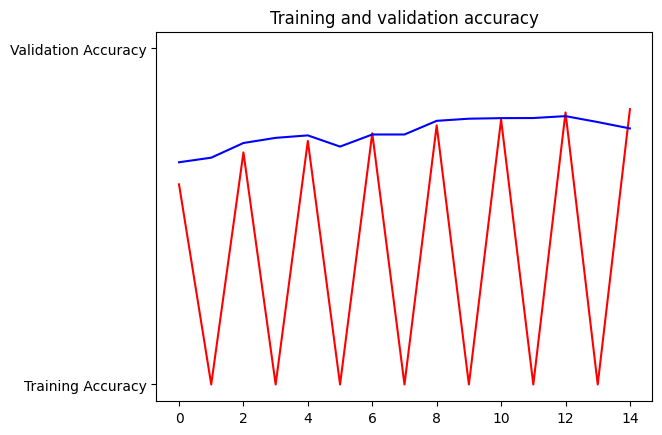

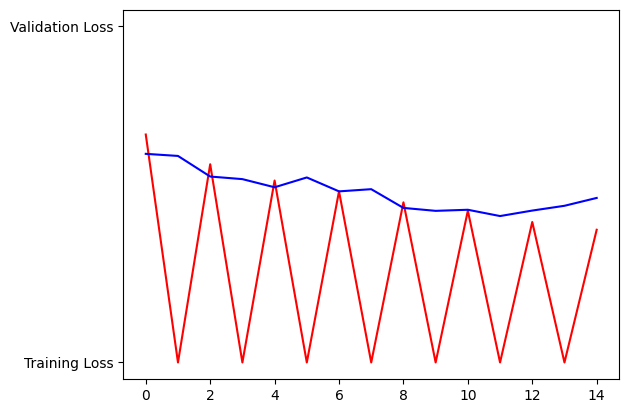

<Figure size 640x480 with 0 Axes>

In [46]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
# Here's a codeblock just for fun. You should be able to upload an image here and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")